In [130]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#Neighborhood
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Desicion tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

#Support vector machine
from sklearn import svm

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# LOAD DATASET

In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-05-24 15:11:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-05-24 15:11:10 (198 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [84]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [59]:
df.shape

(346, 10)

# CLEAN DATA SET

In [85]:
df_=df

In [86]:
df_

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [87]:
l_s=pd.get_dummies(df_['loan_status'])
df_[list(l_s.columns)]=l_s[list(l_s.columns)]

In [88]:
Ed = pd.get_dummies(df_['education'])
df_[list(Ed.columns)]=Ed[list(Ed.columns)]

In [89]:
Gd = pd.get_dummies(df_['Gender'])
df_[list(Gd.columns)]=Gd[list(Gd.columns)]

In [91]:
lista = ['loan_status','education','Gender','effective_date','due_date','Unnamed: 0','Unnamed: 0.1']
df_aux = df_.drop(lista,axis=1)
df_aux.head(9)

,Principal,terms,age,COLLECTION,PAIDOFF,Bechalor,High School or Below,Master or Above,college,female,male
0,1000,30,45,0,1,0,1,0,0,0,1
1,1000,30,33,0,1,1,0,0,0,1,0
2,1000,15,27,0,1,0,0,0,1,0,1
3,1000,30,28,0,1,0,0,0,1,1,0
4,1000,30,29,0,1,0,0,0,1,0,1
5,1000,30,36,0,1,0,0,0,1,0,1
6,1000,30,28,0,1,0,0,0,1,0,1
7,800,15,26,0,1,0,0,0,1,0,1
8,300,7,29,0,1,0,0,0,1,0,1


# VISUALIZATION

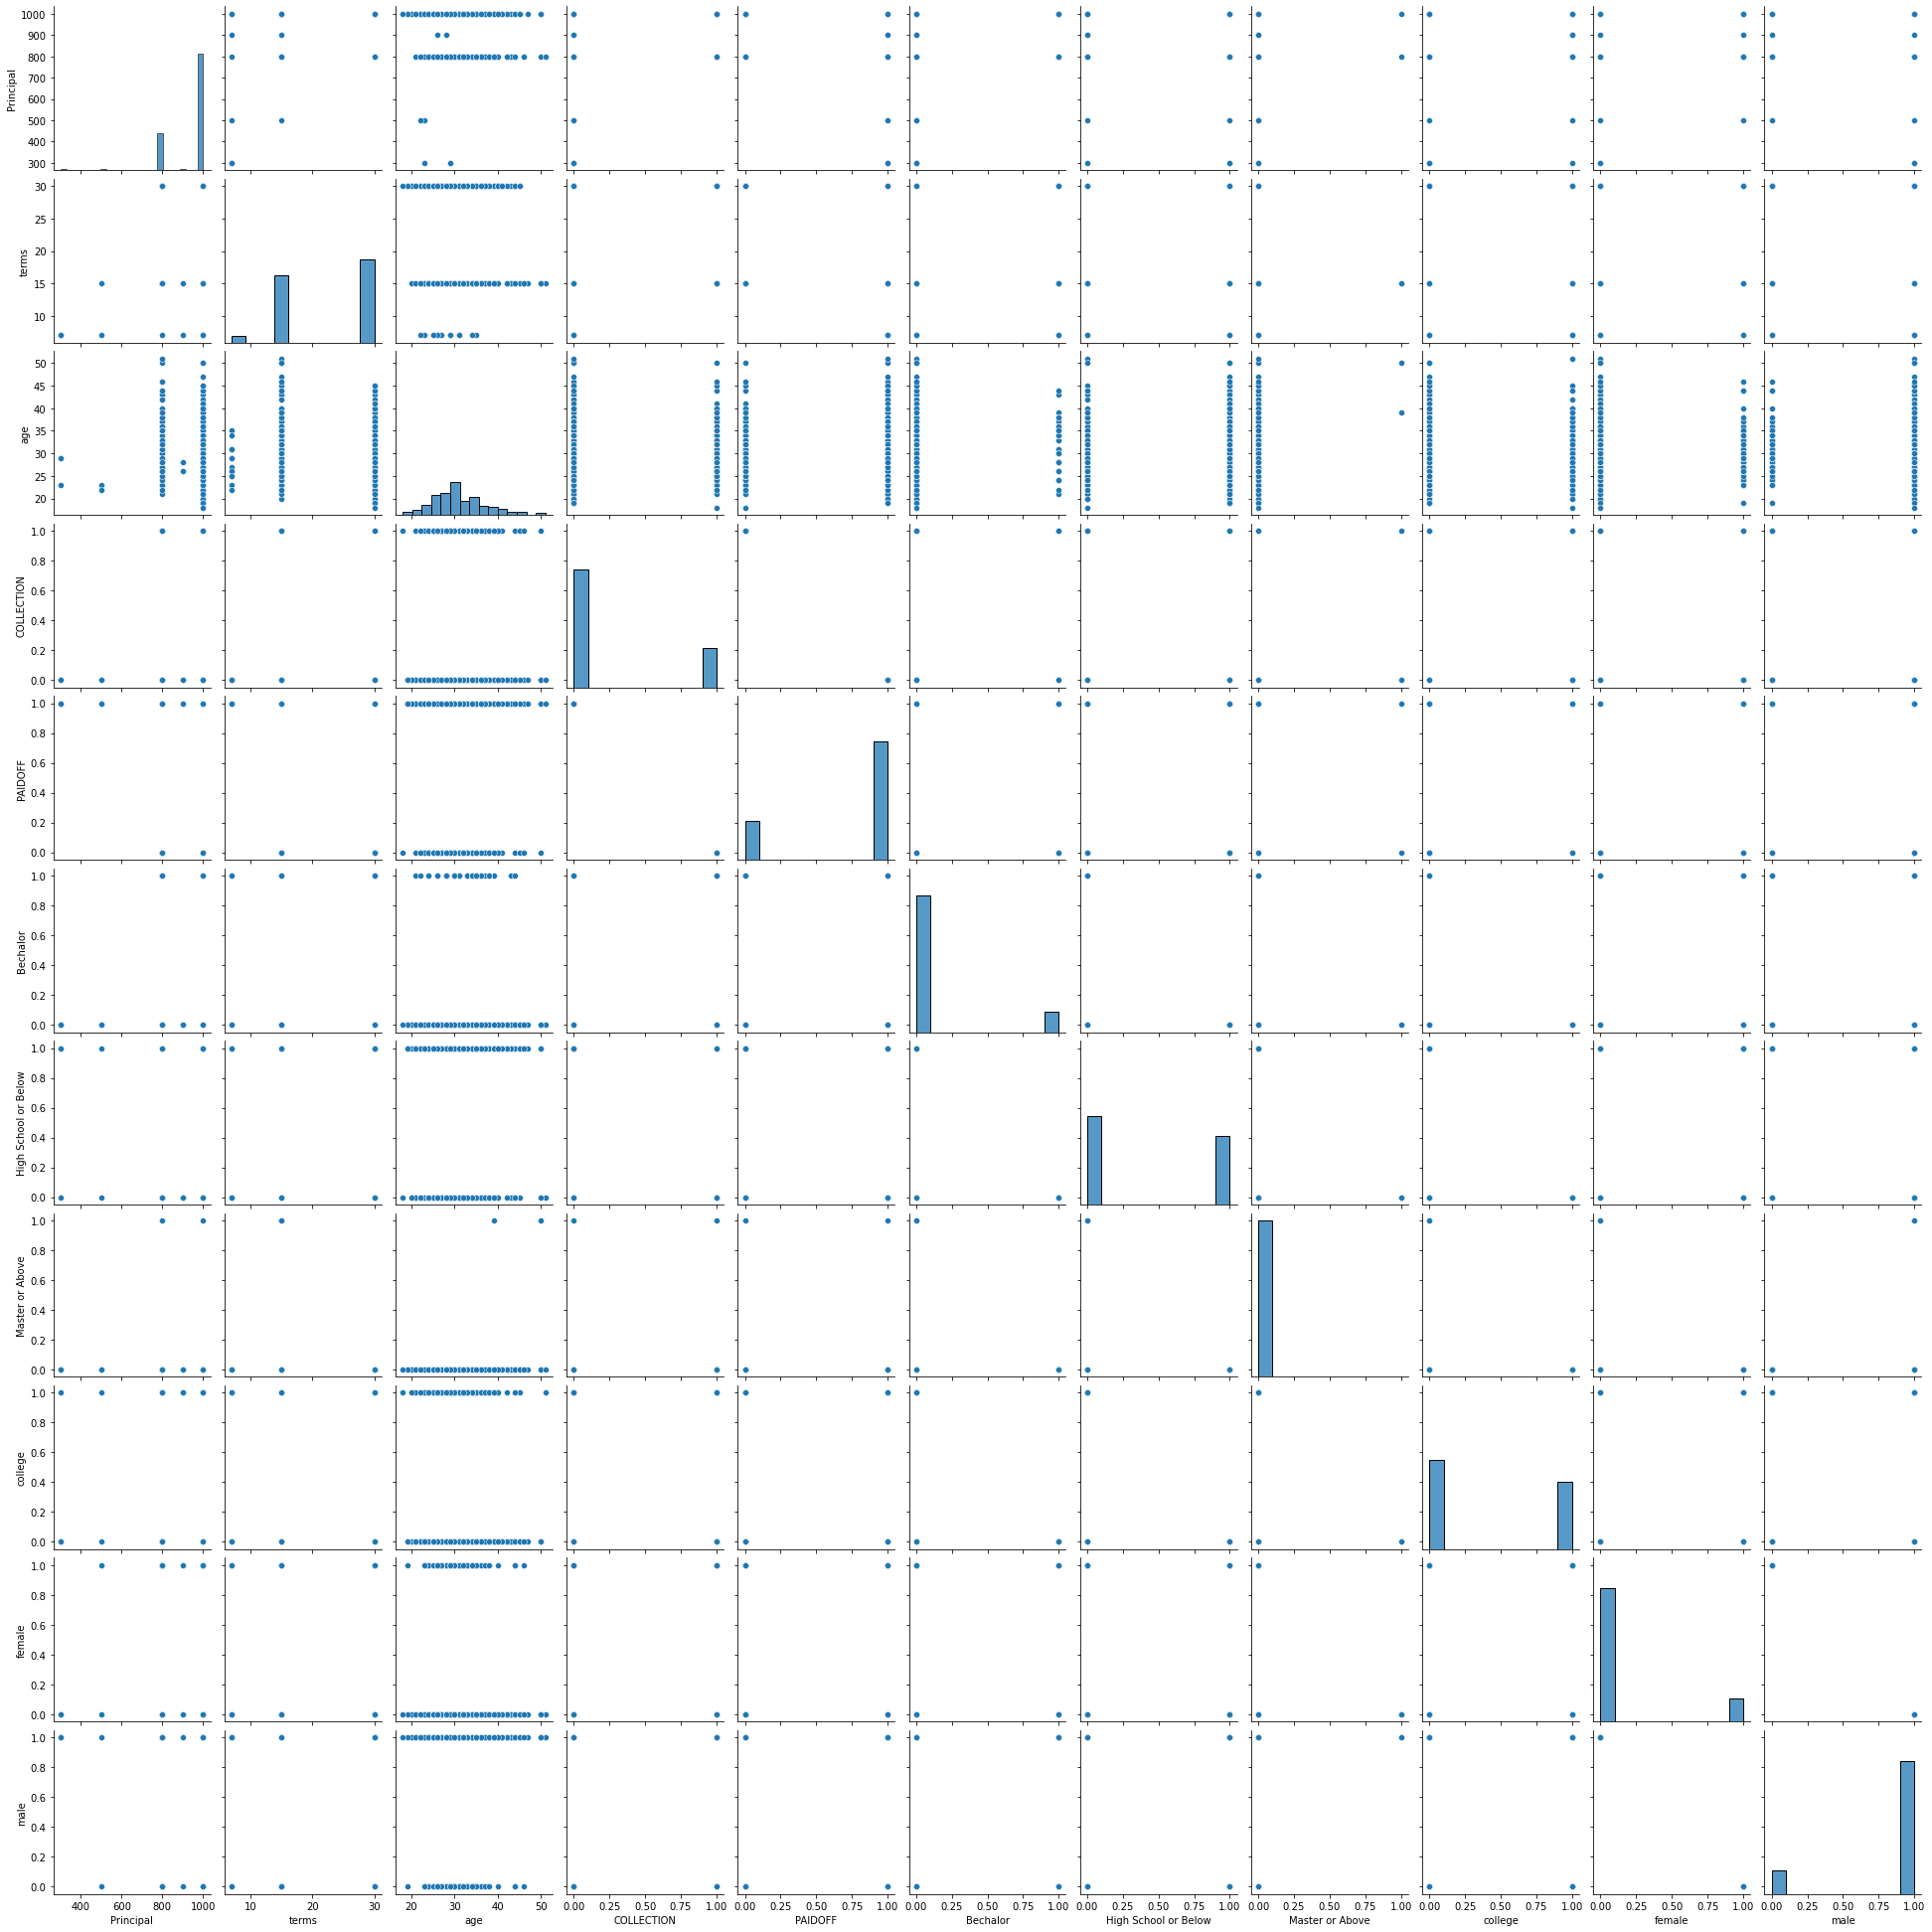

In [50]:
sns.pairplot(df_aux)

In [94]:
df_aux

,Principal,terms,age,COLLECTION,PAIDOFF,Bechalor,High School or Below,Master or Above,college,female,male
0,1000,30,45,0,1,0,1,0,0,0,1
1,1000,30,33,0,1,1,0,0,0,1,0
2,1000,15,27,0,1,0,0,0,1,0,1
3,1000,30,28,0,1,0,0,0,1,1,0
4,1000,30,29,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
341,800,15,32,1,0,0,1,0,0,0,1
342,1000,30,25,1,0,0,1,0,0,0,1
343,800,15,39,1,0,0,0,0,1,0,1
344,1000,30,28,1,0,0,0,0,1,0,1


# MODEL TRAIN NEIGHBORHOOD

In [65]:
lista_aux= list(df_aux.columns.drop('PAIDOFF'))

In [66]:
X = df_aux[lista_aux].values
y= df_aux['PAIDOFF'].values
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=5)

In [67]:
neig = KNeighborsClassifier(n_neighbors=10)
neig.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [68]:
predict_neig = neig.predict(X_test)
print("La exactitud del conjunto de datos entrenados es de: %.2f" % accuracy_score(y_train,neig.predict(X_train)))
print("La exactitud del conjunto de datos testeados es de: %.2f" % accuracy_score(predict_neig, y_test))

La exactitud del conjunto de datos entrenados es de: 0.83
La exactitud del conjunto de datos testeados es de: 0.76


In [69]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.85, 0.8 , 0.75, 0.79, 0.76, 0.77, 0.74, 0.75, 0.73, 0.76])

In [70]:
aux_dict = np.linspace(1,11,Ks)
dictionario = dict(zip(aux_dict,mean_acc))

In [71]:
def dictionar(x):
    aux=1
    for i in x:
        if dictionario[aux] == i:
            return(aux)
        else:
            aux+=1

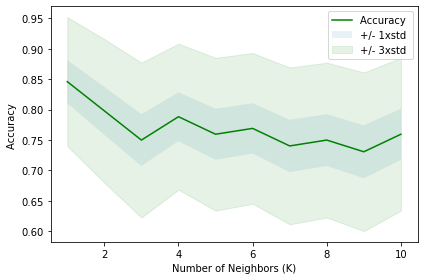

In [72]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [73]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8461538461538461 with k= 1


# METRICS

In [74]:
neig = KNeighborsClassifier(n_neighbors=1)
neig.fit(X_train,y_train)
predict_neig = neig.predict(X_test)

In [75]:
print (classification_report(y_test, predict_neig))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.85      0.96      0.90        74

    accuracy                           0.85       104
   macro avg       0.85      0.76      0.79       104
weighted avg       0.85      0.85      0.84       104



In [76]:
print(confusion_matrix(y_test,predict_neig))

[[17 13]
 [ 3 71]]


# DESICION TREE

## Pre-processing 

In [96]:
df_aux

,Principal,terms,age,COLLECTION,PAIDOFF,Bechalor,High School or Below,Master or Above,college,female,male
0,1000,30,45,0,1,0,1,0,0,0,1
1,1000,30,33,0,1,1,0,0,0,1,0
2,1000,15,27,0,1,0,0,0,1,0,1
3,1000,30,28,0,1,0,0,0,1,1,0
4,1000,30,29,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
341,800,15,32,1,0,0,1,0,0,0,1
342,1000,30,25,1,0,0,1,0,0,0,1
343,800,15,39,1,0,0,0,0,1,0,1
344,1000,30,28,1,0,0,0,0,1,0,1


In [97]:
X = df[['Principal','terms','age','education','Gender']].values

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['female','male'])
X[:,4] = le_sex.transform(X[:,4])

le_ed = preprocessing.LabelEncoder()
le_ed.fit(['Master or Above','High School or Below','Bechalor','college'])
X[:,3] = le_ed.transform(X[:,3])

In [98]:
le_ld = preprocessing.LabelEncoder()
le_ld.fit(['PAIDOFF','COLLECTION'])
y = le_ld.transform(df['loan_status'].values)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [100]:
fails = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
fails.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [101]:
predFail = fails.predict(X_test)

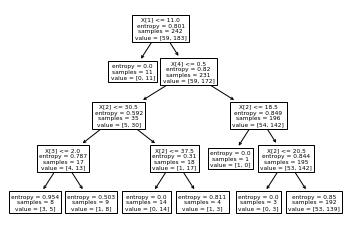

In [102]:
tree.plot_tree(fails)
plt.show()

In [31]:
print(classification_report(y_test, predFail))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.74      1.00      0.85        77

    accuracy                           0.74       104
   macro avg       0.37      0.50      0.43       104
weighted avg       0.55      0.74      0.63       104



/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
print (confusion_matrix(y_test,predFail))

[[ 0 27]
 [ 0 77]]


# SUPPORT VECTOR MACHINE

In [176]:
X = df_aux[['Principal','terms','age','Bechalor','High School or Below','Master or Above','college','female', 'male']].values
y = df_aux['PAIDOFF'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
y_test

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8)

In [179]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [180]:
y_predict = clf.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [181]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.71      1.00      0.83        74

    accuracy                           0.71       104
   macro avg       0.36      0.50      0.42       104
weighted avg       0.51      0.71      0.59       104

Confusion matrix, without normalization
[[ 0 30]
 [ 0 74]]


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


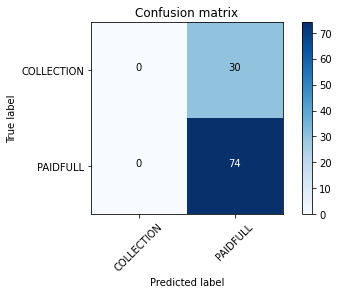

In [183]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDFULL'],normalize= False,  title='Confusion matrix')

# Logistic Regression

In [131]:
df_aux.columns.tolist()
X = df_aux[['Principal','terms','age','Bechalor','High School or Below','Master or Above','college','female', 'male']].values

In [143]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
y = df_aux['PAIDOFF'].values

In [147]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
X_train

array([[ 0.52, -0.96, -0.82, ...,  1.15, -0.42,  0.42],
       [ 0.52, -0.96, -0.98, ..., -0.87, -0.42,  0.42],
       [ 0.52, -0.96, -0.32, ..., -0.87,  2.38, -2.38],
       ...,
       [ 0.52, -0.96, -0.65, ...,  1.15, -0.42,  0.42],
       [ 0.52,  0.92, -0.82, ...,  1.15, -0.42,  0.42],
       [ 0.52,  0.92, -0.16, ..., -0.87, -0.42,  0.42]])

In [148]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_predict_lr = LR.predict(X_test)
print(y_predict_lr)
y_predict_lr_prob = LR.predict_proba(X_test)
print(y_predict_lr_prob)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0.43 0.57]
 [0.4  0.6 ]
 [0.4  0.6 ]
 [0.45 0.55]
 [0.43 0.57]
 [0.41 0.59]
 [0.42 0.58]
 [0.41 0.59]
 [0.45 0.55]
 [0.43 0.57]
 [0.45 0.55]
 [0.44 0.56]
 [0.33 0.67]
 [0.44 0.56]
 [0.37 0.63]
 [0.33 0.67]
 [0.45 0.55]
 [0.41 0.59]
 [0.44 0.56]
 [0.41 0.59]
 [0.37 0.63]
 [0.44 0.56]
 [0.44 0.56]
 [0.38 0.62]
 [0.33 0.67]
 [0.44 0.56]
 [0.44 0.56]
 [0.29 0.71]
 [0.45 0.55]
 [0.33 0.67]
 [0.41 0.59]
 [0.38 0.62]
 [0.41 0.59]
 [0.43 0.57]
 [0.32 0.68]
 [0.4  0.6 ]
 [0.44 0.56]
 [0.39 0.61]
 [0.37 0.63]
 [0.4  0.6 ]
 [0.45 0.55]
 [0.42 0.58]
 [0.38 0.62]
 [0.44 0.56]
 [0.41 0.59]
 [0.44 0.56]
 [0.41 0.59]
 [0.44 0.56]
 [0.4  0.6 ]
 [0.39 0.61]
 [0.36 0.64]
 [0.39 0.61]
 [0.4  0.6 ]
 [0.43 0.57]
 [0.38 0.62]
 [0.35 0.65]
 [0.41 0.59]
 [0.35 0.65]
 [0.41 0.59]
 [0.43 0.57]
 [0.32 0

In [153]:
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, y_predict_lr ,pos_label=0))

0.0


Confusion matrix, without normalization
[[74  0]
 [30  0]]


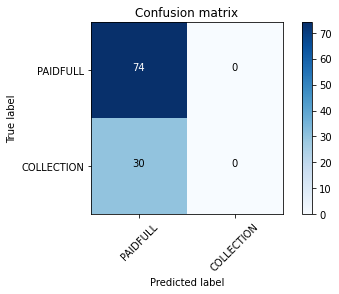

In [189]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict_lr, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDFULL','COLLECTION'],normalize= False,  title='Confusion matrix')

In [190]:
print(classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.71      1.00      0.83        74

    accuracy                           0.71       104
   macro avg       0.36      0.50      0.42       104
weighted avg       0.51      0.71      0.59       104



/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
